# Analysis of Irish Arts Council Funding, 2003 - 2017  

This notebook aims to analyse the funding awarded by the Arts Council of Ireland 
to artists working in a range of artforms over the period 2003 to 2017.

In [1]:
# Import libraries. Pandas requires xlrd to be installed, to handle older 
# Excel files. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Source  
**Arts Council Grants to Artists by Artform, 2003-2010, 2016, 2017.**  
- The Arts Council does not publish historical funding data but the above breakdowns are available from the [Central Statistics Office](www.cso.ie), via CSO publications on ["Women and Men in Ireland"](https://www.cso.ie/en/statistics/womenandmeninireland/).  
(2013 publication does not contain any Arts Council data.)  
- **Note: the date in the URL refers to the date of publication, not the period of the data.**
- These tables do not represent all grants made by the Arts Council, but only grants 
made to individual artists (via schemes such as Cnuas, Artists’ Bursaries, Artists’ Awards.)

## Reading in data

In [2]:
# Dict to hold URLs of spreadsheet data
URL = {}

URL[2003] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2004/entiretablesandgraphs.xls"
URL[2004] = "https://www.cso.ie/en/media/csoie/releasespublications/Women_and_Men_in_Ireland_2005_-_Tables_and_Graphs.xls"
URL[2005] = "https://www.cso.ie/en/media/csoie/releasespublications/Women_and_Men_in_Ireland_2006_-_Tables_and_Graphs.xls"
URL[2006] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2007/womenandmen2007.xls"
URL[2007] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2008/womenandmen2008.xls"
URL[2008] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2009/womenandmen2009.xls"
URL[2009] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2010/womenandmen2010.xls"
URL[2010] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2011/womenandmen2011.xls"
URL[2016] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/ep/womenandmeninireland/2016/socialcohesionandlifestyles/P-WAMII2016TBL3.17.xlsx"
URL[2017] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/ep/womenandmeninireland/2019/genderequality/P-WAMII2019TBL4.9.xlsx"


In [3]:
# Set column names and data types for imported data
column_names = ["artform", "num_male", "num_female", "avg_grant_male", "avg_grant_female"]
column_dtypes = {0:str, 1:int, 2:int, 3:float, 4:float} 

# create dict to store DataFrames indexed by year
df_individual = {}

# Try Excel import using pandas.read_excel()
# https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
# https://www.geeksforgeeks.org/python/working-with-excel-files-using-pandas/

# Read in to DataFrames from data URLs. Each URL source requires different 
# parameters, determined after visually inspecting the source files.
df_individual[2003] = pd.read_excel(URL[2003], sheet_name="Table 4.11", header=[3], usecols="A:E", nrows=10, names=column_names, dtype=column_dtypes)
df_individual[2004] = pd.read_excel(URL[2004], sheet_name="Table 4.13", header=[2], usecols="A:E", nrows=11, names=column_names, dtype=column_dtypes)
df_individual[2005] = pd.read_excel(URL[2005], sheet_name="Table 4.13", header=[3], usecols="A:E", nrows=13, names=column_names, dtype=column_dtypes)
df_individual[2006] = pd.read_excel(URL[2006], sheet_name="Table 4.12", header=[3], usecols="A:E", nrows=13, names=column_names, dtype=column_dtypes)
df_individual[2007] = pd.read_excel(URL[2007], sheet_name="Table 4.12", header=[3], usecols="A:E", nrows=12, names=column_names, dtype=column_dtypes)
df_individual[2008] = pd.read_excel(URL[2008], sheet_name="Table 3.21", header=[3], usecols="A:E", nrows=12, names=column_names, dtype=column_dtypes)
df_individual[2009] = pd.read_excel(URL[2009], sheet_name="Table 3.21", header=[3], usecols="A:E", nrows=10, names=column_names, dtype=column_dtypes)
df_individual[2010] = pd.read_excel(URL[2010], sheet_name="Table 3.21", header=[3], usecols="A:E", nrows=11, names=column_names, dtype=column_dtypes)
df_individual[2016] = pd.read_excel(URL[2016], header=[2], usecols="A:E", nrows=13, names=column_names, dtype=column_dtypes)
df_individual[2017] = pd.read_excel(URL[2017], header=[2], usecols="A:E", nrows=14, names=column_names, dtype=column_dtypes)


In [4]:
# Create list of years for which I have a data source
years_available = list(range(2003,2011)) + [2016, 2017]

# Insert the relevant year as a column in each separate DataFrame
for year in years_available:
    df_individual[year].insert(1, "year", year)

# Look at first result
print(df_individual[years_available[0]].dtypes)


artform              object
year                  int64
num_male              int64
num_female            int64
avg_grant_male      float64
avg_grant_female    float64
dtype: object


In [5]:
# Create empty DataFrame to hold concatenated data
df_all_years = pd.DataFrame()

# Append each year's data to the main DataFrame
for year in years_available:
#    print(df_individual[year].shape)
    df_all_years = pd.concat([df_all_years, df_individual[year]])

# Check stats on the new main DataFrame
df_all_years.describe

<bound method NDFrame.describe of                                 artform  year  num_male  num_female  \
0                        Community arts  2003         0           3   
1                                 Dance  2003         6          19   
2                                 Drama  2003        40          33   
3                                 Film   2003        41          30   
4                            Literature  2003        90          40   
..                                  ...   ...       ...         ...   
9                           Street Arts  2017         4           3   
10                              Theatre  2017        32          47   
11                     Traditional Arts  2017        20          10   
12                          Visual Arts  2017        85         124   
13  Young people, children and educaton  2017         7          26   

    avg_grant_male  avg_grant_female  
0              0.0            1250.0  
1            554.0            3653.

In [6]:
# Export new main DataFrame to CSV for examination
df_all_years.to_csv("df_all_years.csv")

## Cleaning Data

In [7]:
# Make copy of raw DataFrame, pre-cleaning
df = df_all_years.copy()

In [8]:
# Change all column names to lowercase, remove whitespace
df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
    )

# Change all artform names to title case, strip end whitespace and punctuation
df["artform"] = (
        df_all_years["artform"]
        .str.strip()
        .str.title()
        .str.replace("-", "")
        .str.replace(",", "")
    )

# List all the artforms in the raw DataFrame
list_artforms = list(df["artform"].sort_values().unique())

# Show the list of artforms
print(len(list_artforms), "unique entries in Artform column")
list_artforms

27 unique entries in Artform column


['Architecture',
 'Arts Participation',
 'Choreography',
 'Circus',
 'Circus/Spectacle',
 'Community Arts',
 'Dance',
 'Drama',
 'Education',
 'Film',
 'Film/Film & Audio Visual',
 'Literature',
 'MultiDisciplinary Arts',
 'Multidisciplinary Art',
 'Multidisciplinary Arts',
 'Music',
 'Opera',
 'Other',
 'Participation',
 'Street Arts',
 'Summary',
 'Theatre',
 'Traditional Arts',
 'Visual Arts',
 'Young People And Children',
 'Young People Children And Education',
 'Young People Children And Educaton']

There are many inconsistently categorised and formatted artforms in this list.

In [9]:
# Create a dict that specifies how I want to combine various entries in 
# the artform column
artform_map = {

    "Circus": "Circus/Street",
    "Circus/Spectacle": "Circus/Street",
    "Street Arts": "Circus/Street",

    "MultiDisciplinary Arts": "Multidisciplinary Arts",
    "Multidisciplinary Art": "Multidisciplinary Arts",

    "Choreography": "Dance",

    "Drama": "Theatre",

    "Film": "Film and AV",
    "Film/Film & Audio Visual": "Film and AV",

    "Arts Participation": "Arts Participation",
    "Participation": "Arts Participation",

    "Education": "Youth and Education",
    "Young People And Children": "Youth and Education",
    "Young People Children And Educaton": "Youth and Education",
    "Young People Children Education": "Youth and Education",
    "Young People Children And Education": "Youth and Education"
}

In [10]:
# Use the map to replace values in the artform column
df["artform"] = df["artform"].replace(artform_map)

# Again list all the unique artforms in the raw DataFrame
list_artforms = list(df["artform"].sort_values().unique())

# Show the list of artforms
print(len(list_artforms), "unique entries in Artform column")
list_artforms

16 unique entries in Artform column


['Architecture',
 'Arts Participation',
 'Circus/Street',
 'Community Arts',
 'Dance',
 'Film and AV',
 'Literature',
 'Multidisciplinary Arts',
 'Music',
 'Opera',
 'Other',
 'Summary',
 'Theatre',
 'Traditional Arts',
 'Visual Arts',
 'Youth and Education']

In [11]:
# Check for null values
print(df.isnull().sum())

# Drop the entry where the artform is "Summary" (error in raw data?)
df = df[df["artform"] != "Summary"]

# List all the artforms in the raw DataFrame
list_artforms = list(df["artform"].sort_values().unique())

# Show the list of artforms
print(len(list_artforms), "unique entries in Artform column")
list_artforms

# Copy the cleaned DataFrame
df_cleaned = df.copy()

artform             0
year                0
num_male            0
num_female          0
avg_grant_male      0
avg_grant_female    0
dtype: int64
15 unique entries in Artform column


## Deriving data

In [12]:
# Start with the cleaned DataFrame
df = df_cleaned.copy()

# Calculate the total grant awarded to each artform, each year.
df["total_grant_male"] = (df["num_male"] * df["avg_grant_male"])
df["total_grant_female"] = (df["num_female"] * df["avg_grant_female"])

df["total_grant"] = (df["total_grant_male"] + df["total_grant_female"])


In [13]:
# Calculate the total number of recipients each year
df["num_recipients"] = df["num_male"] + df["num_female"]

In [14]:
# Calculate the average grant per recipient per artform per year
df["avg_grant_perperson"] = df["total_grant"] / df["num_recipients"]

df.dtypes

artform                 object
year                     int64
num_male                 int64
num_female               int64
avg_grant_male         float64
avg_grant_female       float64
total_grant_male       float64
total_grant_female     float64
total_grant            float64
num_recipients           int64
avg_grant_perperson    float64
dtype: object


### Store some overall metrics

In [15]:
# Calculate the total amount of funding
total_funding = df["total_grant"].sum()
total_funding_male = df["total_grant_male"].sum()
total_funding_female = df["total_grant_female"].sum()
percent_funding_male = total_funding_male / total_funding
percent_funding_female = total_funding_female / total_funding

# Calculate the total number of recipients
total_recipients = df["num_recipients"].sum()
total_recipients_male = df["num_male"].sum()
total_recipients_female = df["num_female"].sum()
percent_recipients_male = total_recipients_male / total_recipients
percent_recipients_female = total_recipients_female / total_recipients


# Make list of artforms, from most funded to least funded
artforms_by_total_funding = list(
    df.groupby("artform")["total_grant"]
    .mean()
    .sort_values(ascending=False)
    .index
    )


# Show results
print(f"The total amount of funding awarded is €{total_funding:,.2f}. \n"
      f"(€{total_funding_male:,.2f} ({percent_funding_male:.2%}) to men, "
      f"€{total_funding_female:,.2f} ({percent_funding_female:.2%}) to women.)\n")

print(f"The total number of grant recipients is {total_recipients:,g}.\n"
      f"({total_recipients_male:,g} ({percent_recipients_male:.2%}) men and "
      f"{total_recipients_female:,g} ({percent_recipients_female:.2%}) women.)\n")

print(f"The list of artforms in order of Most to Least Funding is:")
for artform in artforms_by_total_funding:
    share=df[df["artform"]==artform]["total_grant"].sum()/total_funding
    print(f"{artform:18} \t {share:.2%}")


The total amount of funding awarded is €55,520,594.48. 
(€31,086,311.45 (55.99%) to men, €24,434,283.03 (44.01%) to women.)

The total number of grant recipients is 7,426.
(3,971 (53.47%) men and 3,455 (46.53%) women.)

The list of artforms in order of Most to Least Funding is:
Visual Arts        	 31.86%
Literature         	 20.03%
Music              	 13.40%
Theatre            	 9.88%
Film and AV        	 6.58%
Multidisciplinary Arts 	 3.45%
Dance              	 5.80%
Traditional Arts   	 4.18%
Arts Participation 	 1.02%
Other              	 0.59%
Opera              	 1.13%
Circus/Street      	 0.82%
Youth and Education 	 0.62%
Architecture       	 0.63%
Community Arts     	 0.02%


### Aggregate data by year

In [16]:
# Create a DataFrame that aggregates data by year
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
# https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-groupby/

# df_year = df.drop(columns=["artform","avg_grant_male","avg_grant_female"]).groupby("year").sum()

df_year = df.pivot_table(
    values=["num_male","num_female","num_recipients",
            "total_grant_male","total_grant_female","total_grant"],
    index="year",
    aggfunc="sum")


print(df_year)

      num_female  num_male  num_recipients  total_grant  total_grant_female  \
year                                                                          
2003         271       390             661   2600261.00          1004362.00   
2004         248       319             567   2535032.00           912601.00   
2005         379       458             837   4014639.00          1547625.00   
2006         383       506             889   5548941.00          2190479.00   
2007         454       548            1002   7457706.00          3180160.00   
2008         405       486             891   6412235.00          2620656.00   
2009         312       345             657   5672811.90          2438530.03   
2010         332       348             680   6201898.58          2831881.00   
2016         291       273             564   6981434.00          3582262.00   
2017         380       298             678   8095636.00          4125727.00   

      total_grant_male  
year                    
2

### Aggregate data by artform

In [17]:
# Create pivot table DataFrames that aggregate recipients and funding 
# by artform

df_artform_recipients = df.pivot_table(
    index="artform", columns="year", 
    values="num_recipients", aggfunc="sum")

df_artform_grants = df.pivot_table(
    index="artform", columns="year", 
    values="total_grant", aggfunc="sum")

# Show these DataFrames
print(df_artform_recipients.head(3))
print(df_artform_grants.head(3))

year                2003  2004  2005  2006  2007  2008  2009  2010  2016  2017
artform                                                                       
Architecture         NaN   6.0   6.0  11.0   6.0   8.0   NaN   NaN   9.0   6.0
Arts Participation   NaN   NaN   NaN   NaN  19.0  18.0  12.0  14.0  14.0  15.0
Circus/Street        NaN   NaN   NaN  11.0  15.0   9.0  11.0   NaN  13.0   7.0
year                2003     2004     2005     2006      2007     2008  \
artform                                                                  
Architecture         NaN  61280.0  19600.0  41603.0   45000.0  79850.0   
Arts Participation   NaN      NaN      NaN      NaN   93940.0  48355.0   
Circus/Street        NaN      NaN      NaN  24893.0  112501.0  59993.0   

year                   2009     2010      2016      2017  
artform                                                   
Architecture            NaN      NaN   48606.0   54394.0  
Arts Participation  47620.0  93096.0  126016.0  159345.0 

### Calculate gender differences in funding

In [18]:
# Calculate the difference in number of awards between men and women
df["female_share"] = np.where(
    df["num_recipients"] > 0,
    df["num_female"] / df["num_recipients"],
    np.nan
)

In [19]:
# Calculate the average difference in grant between men and women
df["avg_grant_gap"] = df["avg_grant_female"] - df["avg_grant_male"]

In [20]:
# The gender gaps should be calculated as weighted means - or, means over 
# all years in the dataset.

# New pivot table by artform
df_artforms_gender = df.pivot_table(
    values=["num_male","num_female","num_recipients",
            "total_grant_male","total_grant_female", "total_grant"],
    index="artform",
    aggfunc="sum"
    )


df_artforms_gender["avg_grant_all"] = (
    df_artforms_gender["total_grant"] / df_artforms_gender["num_recipients"]
)

df_artforms_gender["female_share"] = (
    df_artforms_gender["num_female"] / df_artforms_gender["num_recipients"]
)

# For each artform, calculate the average grant to each gender
for gender in ["male", "female"]:
    df_artforms_gender["avg_grant_"+gender] = (
        df_artforms_gender["total_grant_"+gender] / 
        df_artforms_gender["num_"+gender]
        )

# For each artform, calculate the difference between the average grants.
# Result should be NaN for artforms which have either no male, or no female, 
# recipients.
df_artforms_gender["avg_gap"] = np.where(
        ((df_artforms_gender["num_male"] > 0)&(df_artforms_gender["num_female"] > 0)),
        df_artforms_gender["avg_grant_female"] - df_artforms_gender["avg_grant_male"],
        np.nan
    )

# Calculate the grant gap as a percentage.
df_artforms_gender["avg_gap_frac"] = np.where(
        ((df_artforms_gender["num_male"] > 0)&(df_artforms_gender["num_female"] > 0)),
        (df_artforms_gender["avg_gap"] /
        (df_artforms_gender["total_grant"]/df_artforms_gender["num_recipients"])),
        np.nan
    )

# Sort the resulting DataFrame
df_artforms_gender.sort_values(by="avg_gap", inplace=True)

# Display the resulting DataFrame
df_artforms_gender


,num_female,num_male,num_recipients,total_grant,total_grant_female,total_grant_male,avg_grant_all,female_share,avg_grant_male,avg_grant_female,avg_gap,avg_gap_frac
artform,,,,,,,,,,,,
Opera,50,47,97,625895.00,207839.00,418056.00,6452.525773,0.515464,8894.808511,4156.780000,-4738.028511,-0.734291
Architecture,29,23,52,350333.00,152688.00,197645.00,6737.173077,0.557692,8593.260870,5265.103448,-3328.157421,-0.493999
Arts Participation,70,22,92,568372.00,401016.00,167356.00,6177.956522,0.760870,7607.090909,5728.800000,-1878.290909,-0.304031
Music,437,772,1209,7438200.10,2182374.00,5255826.10,6152.357403,0.361456,6808.064896,4993.990847,-1814.074050,-0.294858
Literature,462,785,1247,11118062.97,3723967.00,7394095.97,8915.848412,0.370489,9419.230535,8060.534632,-1358.695903,-0.152391
Visual Arts,1066,1031,2097,17686494.03,8452156.03,9234338.00,8434.188856,0.508345,8956.680892,7928.851811,-1027.829082,-0.121865
Circus/Street,33,33,66,456285.00,214185.00,242100.00,6913.409091,0.500000,7336.363636,6490.454545,-845.909091,-0.122358
Multidisciplinary Arts,117,123,240,1916383.00,927225.00,989158.00,7984.929167,0.487500,8041.934959,7925.000000,-116.934959,-0.014644
Film and AV,255,375,630,3650621.80,1471803.00,2178818.80,5794.637778,0.404762,5810.183467,5771.776471,-38.406996,-0.006628


## Investigative plots

### Grants per artform per year

Text(0.45, 0.96, 'Visual Arts, Literature and Music receive the highest amount of funding')

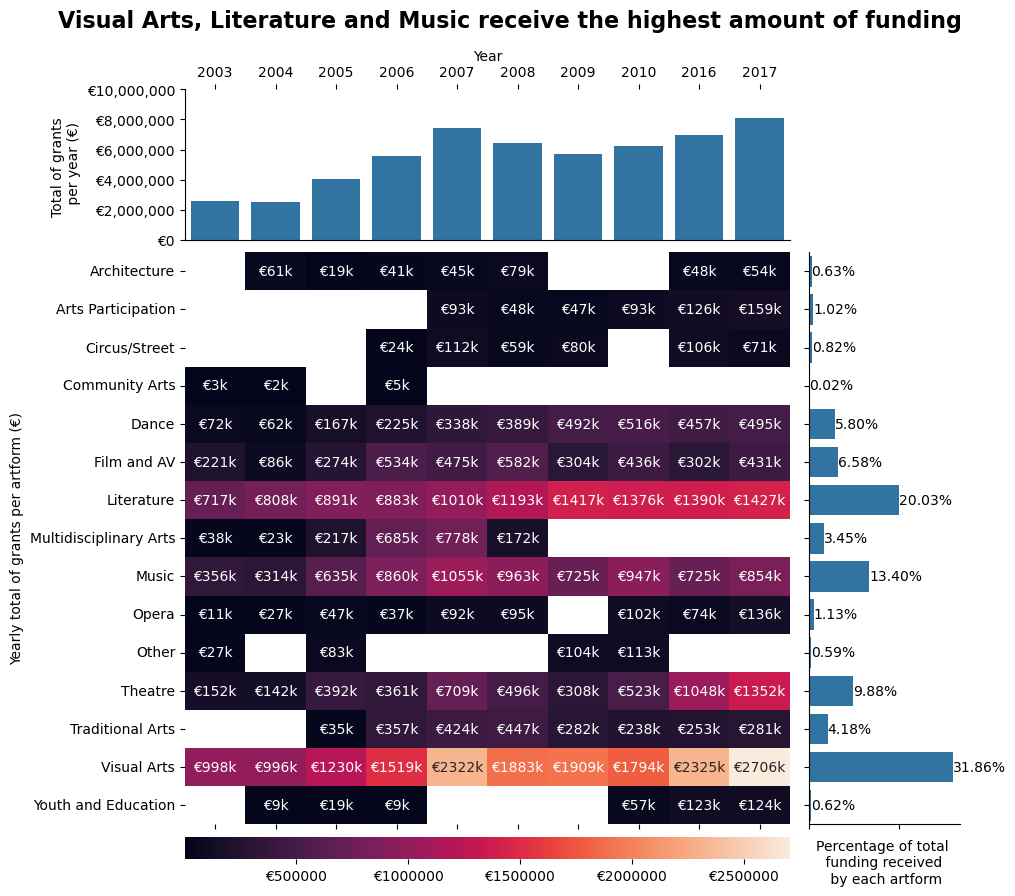

In [21]:
# Create shorter labels for heatmap cells, by dividing values by 1000 
# to represent €1000s.
# Adapted from https://www.geeksforgeeks.org/python/how-to-add-text-in-a-heatmap-cell-annotations-using-seaborn-in-python/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
df_artform_grants_labels = "€"+(df_artform_grants.fillna(0)/1000).astype(int).astype(str)+"k"


# Create a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10), sharex=False,
                        gridspec_kw=dict(height_ratios=[0.2,0.76,0.03],
                                        width_ratios=[0.80,0.20]))

# delete the unwanted subplots 
fig.delaxes(axes[0,1])
fig.delaxes(axes[2,1])

# shrink the space between subplots
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# remove plot spines for clarity
# (from https://towardsdatascience.com/handling-plot-axis-spines-in-python-f143b8554da2/)
sns.despine()


# Top: Bar plot of total grants awarded each year.
plt.subplot(3,2,1)
ax = sns.barplot(df_year["total_grant"])
# Reformat y-axis lablels to something more readable
ylocs, ylabels = plt.yticks()
ylabels_formatted = ["€{:,.0f}".format(x) for x in ylocs]
# ref: https://stackoverflow.com/a/14406447 for tick labels on top
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.yticks(ylocs, ylabels_formatted)
ax.set_ylabel("Total of grants \n per year (€)")
ax.set_xlabel("Year")


# Middle: Heatmap of grants awarded by artform, 
# with colorbar on separate subplot to keep plots aligned.
# Suggested by https://stackoverflow.com/a/65038112 (answer to question 
# "Seaborn heatmaps in subplots - align x-axis")
plt.subplot(3,2,3)
ax = sns.heatmap(df_artform_grants, annot=df_artform_grants_labels, fmt="", 
                cbar_ax=axes[2,0],
                cbar_kws={'format': '€%.0f',
                        "orientation": "horizontal"})
plt.ylabel("Yearly total of grants per artform (€)", x= 0.2)
ax.set_xticklabels([])
plt.xlabel("")


# Right: Bar plot of percentage of summed grants awarded to each artform.
plt.subplot(3,2,4)
df_plot_percentages = df_artform_grants.sum(axis=1)/total_funding
ax = sns.barplot(df_plot_percentages, orient="h")
# Label bars with percentage values
# ref: https://stackoverflow.com/a/68323374
ax.bar_label(ax.containers[0], fmt="{:.2%}")
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylabel("")
ax.set_xlabel("Percentage of total \n funding received \n by each artform")

# Set plot supertitle
plt.suptitle(
    "Visual Arts, Literature and Music receive the highest amount of funding", 
    fontsize=16, fontweight='bold', x=0.45, y=0.96)


### Grants to each artform each year

Text(0.5, 1.0, 'Arts Council grants to artists, by artform')

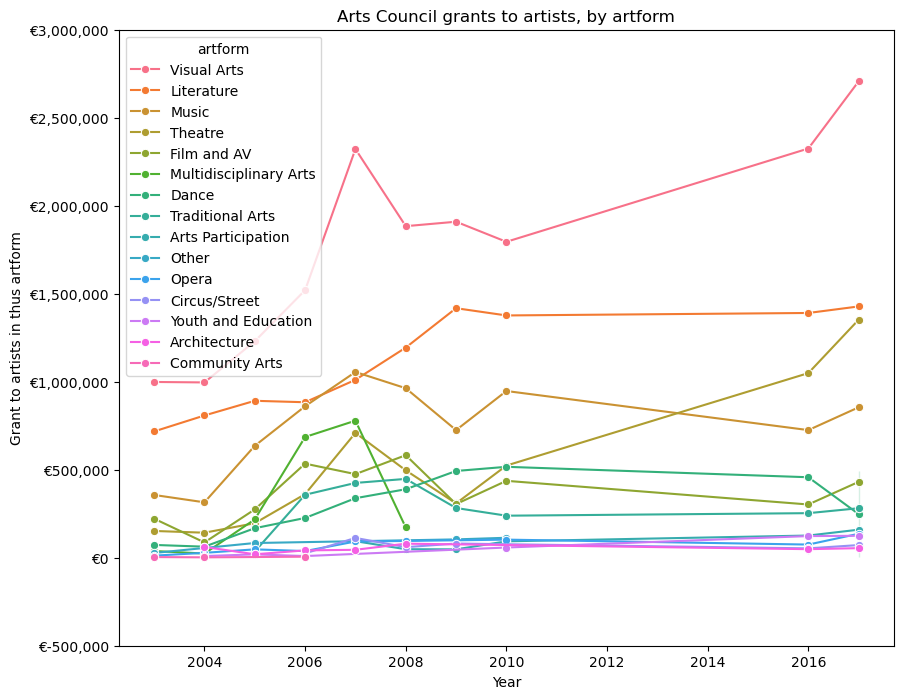

In [22]:
# Plot the grants awarded by artform.
plt.figure(figsize=(10,8))

sns.lineplot(df, 
            x="year",
            y="total_grant",
            hue="artform",
            hue_order=artforms_by_total_funding,
            marker="o"
            )


# grab ytick locations and reformat to make more readable ytick labels
ylocs, ylabels = plt.yticks()
ylabels_formatted = ["€{:,.0f}".format(x) for x in ylocs]
plt.yticks(ylocs, ylabels_formatted)


plt.ylabel("Grant to artists in thus artform")
plt.xlabel("Year")
plt.title("Arts Council grants to artists, by artform")


### Variation in average grants to each artform

Text(0.5, 0.92, 'Comparison of Funding per Artform')

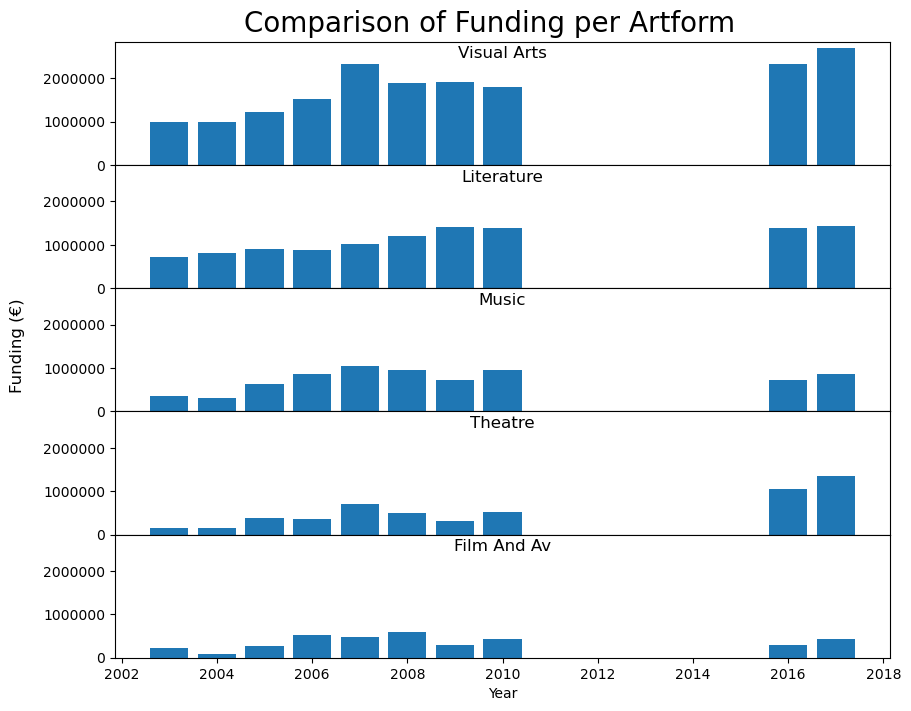

In [23]:
# Plot funding for selected artforms with shared x- and y-axes.

# Choose artforms to plot
selected_artforms = artforms_by_total_funding[0:5]
num_selected_artforms = len(selected_artforms)

fig, axes = plt.subplots(num_selected_artforms, 1, 
                        figsize=(10, 8), sharex=True, sharey=True)

# remove vertical space between subplots
fig.subplots_adjust(hspace=0)

plt.xlabel("Year")

# plot each artform to each subplot
for i in range(0,num_selected_artforms):
    artform = selected_artforms[i]
    data=df_artform_grants.loc[artform]
    plt.subplot(num_selected_artforms, 1, i+1)
    plt.bar(data.index, data.values)
    plt.title(artform.title(), x=0.5, y=0.8)
    plt.ticklabel_format(axis="y", style="plain")

# add year ticks to last subplot
plt.xlabel("Year")
fig.supylabel("Funding (€)")

fig.suptitle("Comparison of Funding per Artform", y=0.92, fontsize=20)

Text(0.5, 1.0, 'Variation in Yearly Average Grants, by Artform')

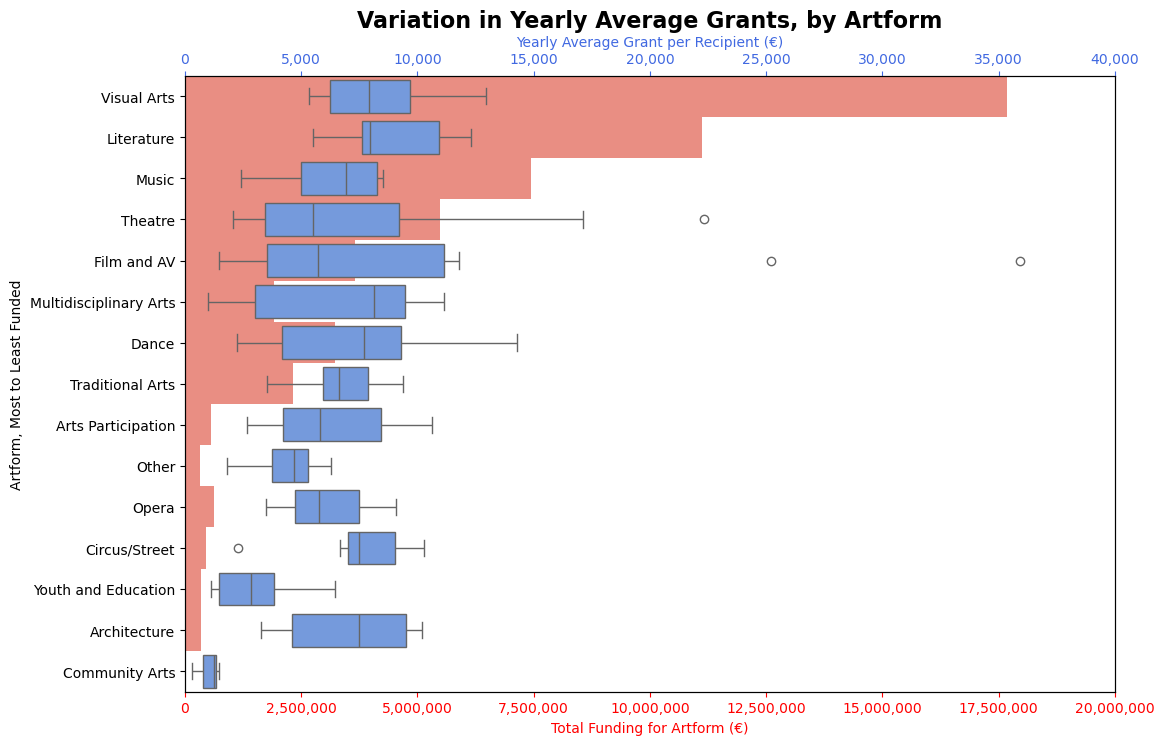

In [24]:
plt.figure(figsize=(12, 8))


# Plot total funding for each artform
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
ax1 = sns.barplot(df_artform_grants.sum(axis=1), width=1, 
                 orient="h", color="salmon",
                 order=artforms_by_total_funding)
ax1.tick_params(axis="x", color="red", labelcolor="red")
plt.xticks(plt.xticks()[0], labels=["{:,.0f}".format(x) for x in plt.xticks()[0]])
ax1.set_xlim(left=0)
plt.xlabel("Total Funding for Artform (€)", color="red")
plt.ylabel("Artform, Most to Least Funded")



# Plot a Boxplot of average grant per artform, on a secondary axis
# ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html
ax2 = ax1.twiny()
ax2 = sns.boxplot(df,
            x="avg_grant_perperson",
            y="artform",
            order=artforms_by_total_funding,
            color="cornflowerblue")

ax2.tick_params(axis="x", color="royalblue", labelcolor="royalblue")
plt.xticks(plt.xticks()[0], labels=["{:,.0f}".format(x) for x in plt.xticks()[0]])
plt.xlabel("Yearly Average Grant per Recipient (€)", color="royalblue")
ax2.set_xlim(left=0)



plt.title("Variation in Yearly Average Grants, by Artform",
          fontsize=16, fontweight="bold")


### Grant differences per gender

Text(0.5, 1.0, 'Grant Size vs Gender Balance')

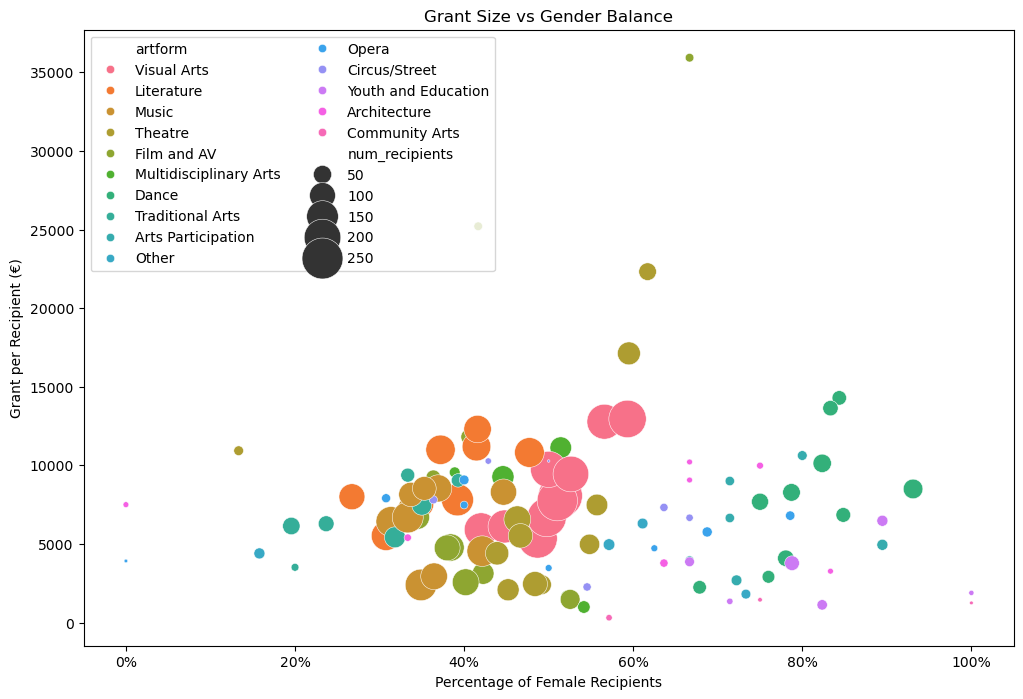

In [25]:
# Plot the size of grant against the percentage of female recipients.

plt.figure(figsize=(12, 8))

# Ref: https://stackoverflow.com/a/59955188, 
# "seaborn scatterplot scale bubble size to larger dots"

ax = sns.scatterplot(df,
                x="female_share",
                y="avg_grant_perperson",
                hue="artform",
                size="num_recipients",
                sizes=(0,1000),
                legend="brief",
                hue_order=artforms_by_total_funding)


ax.legend(loc='upper left', ncol=2)
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels, loc='upper left', ncol=2, title="Title")

plt.xlabel("Percentage of Female Recipients")
plt.ylabel("Grant per Recipient (€)")

# format x-ticks and remove the first and last
plt.xticks(
    plt.xticks()[0][1:-1], 
    labels=["{:00.0%}".format(x) for x in plt.xticks()[0][1:-1]]
    )
plt.title("Grant Size vs Gender Balance")



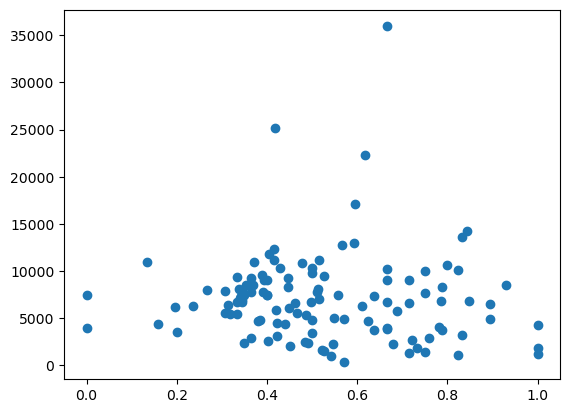

In [26]:
plt.scatter(df["female_share"],df["avg_grant_perperson"])

Text(0.5, 1.0, 'As average grant size increases, female funding gap increases.')

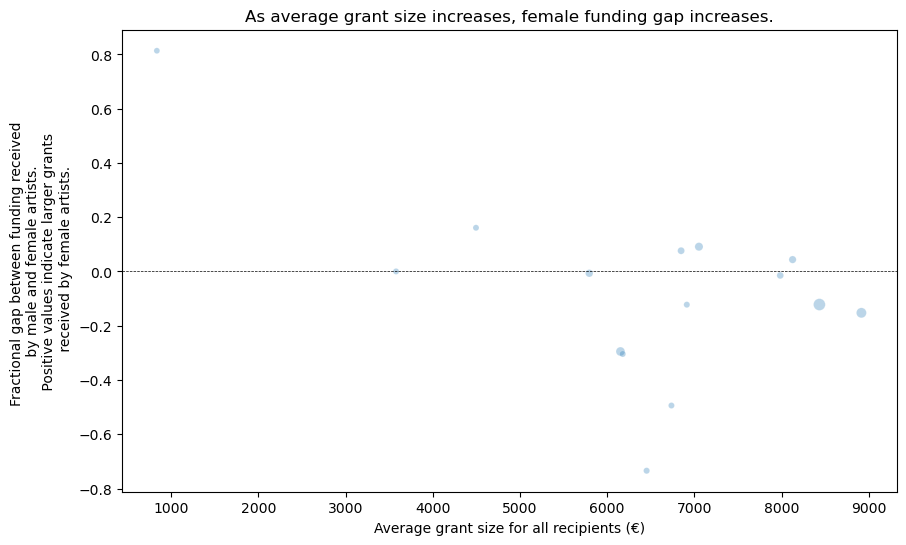

In [27]:

artforms_to_plot = artforms_by_total_funding
plt.figure(figsize=(10,6))

sns.scatterplot(df_artforms_gender.loc[artforms_to_plot],
                x="avg_grant_all",
                y="avg_gap_frac",
                size="total_grant",
#                sizes=(30,30000),
                alpha=0.3,
                legend=False)

plt.axhline(0, color="black", linestyle="--", lw=0.5)
plt.ylabel("Fractional gap between funding received \n by male and female artists. \n Positive values indicate larger grants \n received by female artists.")
plt.xlabel("Average grant size for all recipients (€)")
plt.title("As average grant size increases, female funding gap increases.")

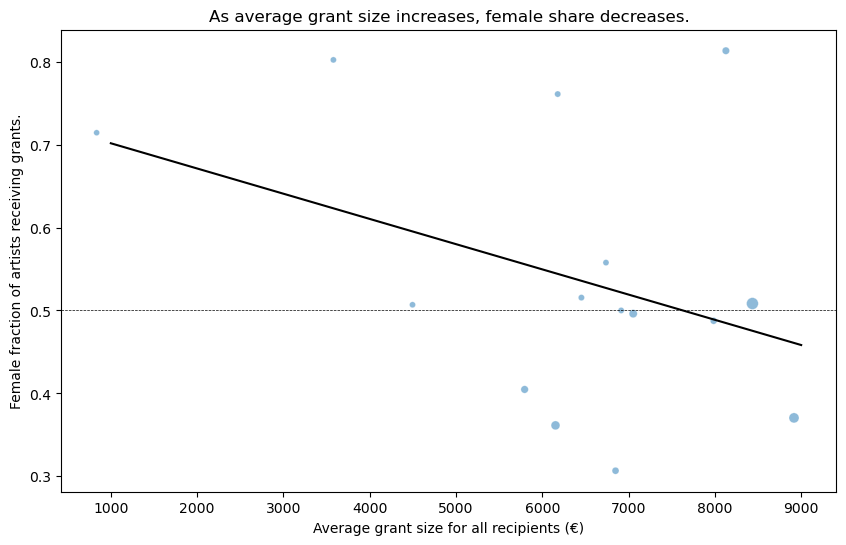

In [28]:

plot_data = df_artforms_gender.loc[artforms_to_plot]

slope, intercept = np.polyfit(plot_data["avg_grant_all"], plot_data["female_share"], 1)
linfit_x_values = np.arange(1000,9000,1)
linfit_y_values = (linfit_x_values * slope) + intercept

plt.figure(figsize=(10,6))

sns.scatterplot(plot_data,
                y="female_share",
                x="avg_grant_all",
                size="total_grant",
#                sizes=(30,30000),
                alpha=0.5,
                legend=False)

sns.lineplot(
    x=linfit_x_values,
    y=linfit_y_values, 
    color='black')

plt.axhline(0.5, color="black", linestyle="--", lw=0.5)
plt.ylabel("Female fraction of artists receiving grants.")
plt.xlabel("Average grant size for all recipients (€)")
plt.title("As average grant size increases, female share decreases.")


slope, intercept = np.polyfit(df_artforms_gender["avg_grant_all"], df_artforms_gender["female_share"], 1)
linfit_x_values = np.arange(1000,9000,1)
linfit_y_values = (linfit_x_values * slope) + intercept


Text(0.5, 1.0, 'Average Euro Grant Gap between Genders, by Artform')

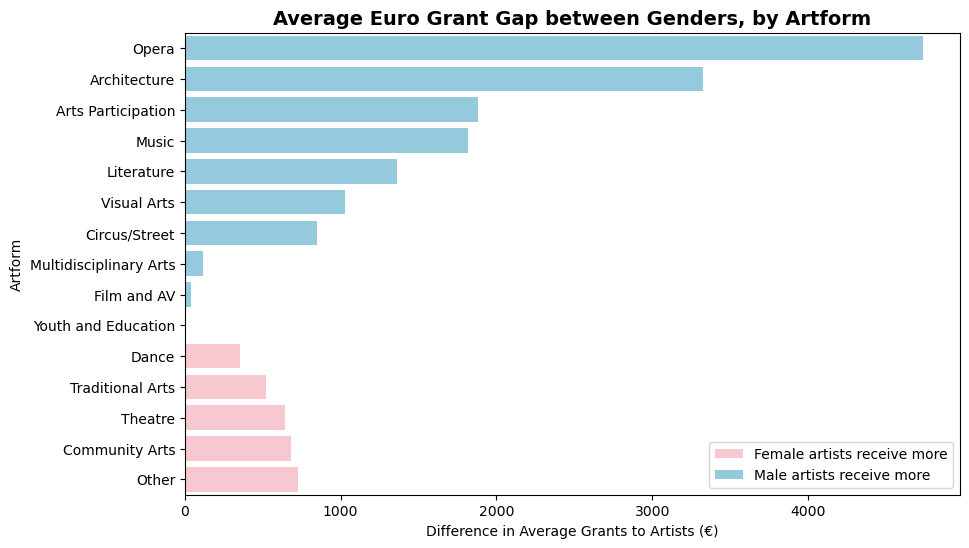

In [29]:
plt.figure(figsize=(10, 6))

# Plot the gap in grants by gender. Plot twice and clip each series in order to 
# use separate colours.
sns.barplot(
    df_artforms_gender["avg_gap"].clip(lower=0), 
    orient="h", color="pink", 
    label="Female artists receive more")
sns.barplot(
    df_artforms_gender["avg_gap"].clip(upper=0)*-1, 
    orient="h", color="skyblue", 
    label="Male artists receive more")

plt.legend()
#plt.axvline(0, color="black")
plt.xlabel("Difference in Average Grants to Artists (€)")
plt.ylabel("Artform")
plt.title("Average Euro Grant Gap between Genders, by Artform",
          fontsize=14, fontweight="bold")

Text(0.5, 1.0, 'Average Percentage Grant Gap between Genders, by Artform')

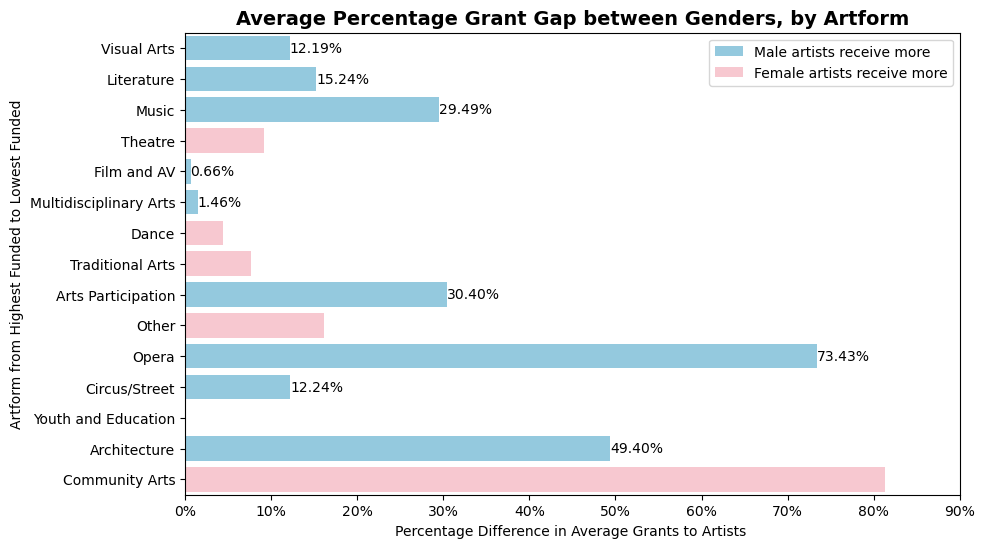

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

# Extract the data for this plot.
data = df_artforms_gender["avg_gap_frac"]

# Plot the fractional gap in grants by gender.
# Use mask to separate plots and thereby colour separately.
# (Ref: https://stackoverflow.com/a/74109587, 
# "Is it possible to clip and fill other value with NAN in pandas?")
sns.barplot(
    abs(data.mask(data.gt(0))), 
    orient="h", color="skyblue", 
    label="Male artists receive more",
    order=artforms_by_total_funding)

sns.barplot(
    abs(data.mask(data.lt(0))), 
    orient="h", color="pink", 
    label="Female artists receive more",
    order=artforms_by_total_funding)

# Label each barplot on the bars
for container in ax.containers[0:1]:
    ax.bar_label(container, fmt="{:.2%}") 

# Format xtick labels as percentages
plt.xticks(plt.xticks()[0], labels=["{:00.0%}".format(x) for x in plt.xticks()[0]])

plt.legend()
plt.xlabel("Percentage Difference in Average Grants to Artists ")
plt.ylabel("Artform from Highest Funded to Lowest Funded")
plt.title("Average Percentage Grant Gap between Genders, by Artform",
          fontsize=14, fontweight="bold")

## To Do:  
- contact Arts Council re. data error 2017? missing year?
- derive more data e.g per-capita grants, gender gap
- look at comparative data sources - Eurostat? Arts Council annual grant figures?